In [37]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

census_csv = pd.read_csv('/Users/joshuafeinberg/Documents/U-of-O-Bootcamp/Bootcamp_Class_Folder/projects/PUFs/clean_master_merge.csv')

In [38]:
#dropping columns that don't have data for these columns
clean_census = census_csv.dropna(subset=['ANXIOUS', 'WORRY', 'INTEREST', 'DOWN'])


#dropping unnessary columns
clean_census = clean_census.drop(['RRACE.1','EEDUC.1'], axis=1)

# DROP RRACE.1, SCRAM, EEDUC.1
#renaming this column
clean_census = clean_census.rename(columns={'TENURE':'HOME OWNERSHIP',
                                            'EEDUC':'EDUCATION',
                                            'RRACE':'RACE',
                                            'TBIRTH_YEAR':'BIRTH YEAR',
                                            'RHISPANIC':'HISPANIC',
                                            'MS':'MARTIAL STATUS',
                                            'EGENID_BIRTH':'GEN ASN @ BIRTH',
                                            'GENID_DESCRIBE':'GEN ID DESCRIBE',
                                            'SEXUAL_ORIENTATION': 'SEXUAL ORIENTATION',
                                            'ANYWORK': 'EMPLOY STATUS 7D',
                                            'WEEK':'SERVEY DATE',
                                            'KIDS_LT5Y':'KIDS 0-5',
                                            'KIDS_5_11Y':'KIDS 5-11',
                                            'KIDS_12_17Y':'KIDS 12-17',
                                            'EST_ST':'STATE'
                                            })
clean_census.head()

,SCRAM,ANXIOUS,WORRY,INTEREST,DOWN,EDUCATION,RACE,BIRTH YEAR,HISPANIC,MARTIAL STATUS,...,GEN ID DESCRIBE,SEXUAL ORIENTATION,EMPLOY STATUS 7D,SERVEY DATE,INCOME,HOME OWNERSHIP,KIDS 0-5,KIDS 5-11,KIDS 12-17,STATE
0,V410000001S10011174410111,2.0,2.0,2.0,2.0,7,2,1974,1,3.0,...,2.0,2.0,1.0,41,5.0,3.0,NaN,NaN,1.0,1
1,V410000001S18010684900121,4.0,4.0,4.0,4.0,7,1,1986,1,1.0,...,2.0,2.0,1.0,41,5.0,2.0,1.0,1.0,NaN,1
2,V410000001S30011241510121,1.0,1.0,2.0,2.0,5,1,1986,1,5.0,...,1.0,2.0,2.0,41,1.0,1.0,NaN,NaN,NaN,1
3,V410000001S30011770510111,2.0,1.0,2.0,2.0,6,1,1976,1,3.0,...,2.0,2.0,1.0,41,4.0,2.0,NaN,NaN,NaN,1
4,V410000001S37010270800121,1.0,1.0,1.0,1.0,7,1,1953,1,3.0,...,1.0,2.0,1.0,41,5.0,3.0,NaN,NaN,NaN,1


In [39]:
#CREATING A DATAFRAM WITH THE REQUIRED COLUMNS I NEED FOR MY ANALYSIS
clean_df = clean_census[['SCRAM', 'ANXIOUS','WORRY','INTEREST','DOWN','GEN ASN @ BIRTH','RACE','HISPANIC', 'GEN ASN @ BIRTH','GEN ID DESCRIBE','SEXUAL ORIENTATION']]
clean_df


,SCRAM,ANXIOUS,WORRY,INTEREST,DOWN,GEN ASN @ BIRTH,RACE,HISPANIC,GEN ASN @ BIRTH,GEN ID DESCRIBE,SEXUAL ORIENTATION
0,V410000001S10011174410111,2.0,2.0,2.0,2.0,2,2,1,2,2.0,2.0
1,V410000001S18010684900121,4.0,4.0,4.0,4.0,2,1,1,2,2.0,2.0
2,V410000001S30011241510121,1.0,1.0,2.0,2.0,1,1,1,1,1.0,2.0
3,V410000001S30011770510111,2.0,1.0,2.0,2.0,2,1,1,2,2.0,2.0
4,V410000001S37010270800121,1.0,1.0,1.0,1.0,1,1,1,1,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
821715,V530068499,4.0,4.0,4.0,4.0,2,1,1,2,2.0,2.0
821716,V530068500,2.0,1.0,1.0,1.0,1,1,1,1,1.0,2.0
821717,V530068501,2.0,2.0,1.0,1.0,1,1,2,1,1.0,1.0
821719,V530068503,1.0,1.0,2.0,2.0,1,1,1,1,1.0,3.0


In [40]:
#RENAMING THE HISPANIC VALUES IN THE HISPANIC COLUMN TO 'LATINX' 

#df['col_name'] = df['col_name'].replace({'G': 1})
#clean_df['HISPANIC'] = clean_df['HISPANIC'].replace({2:'LATINX'})
#df.loc[df['shield'] > 35] = 0

#df['Category'] = df['Count']
#df.loc[df['Count'] > 3, 'Category'] = '4+'

#clean_df['race_comb'] = clean_df['HISPANIC']
#clean_df.loc[clean_df['HISPANIC'] == 2,'HISPANIC'] = 'LATINX'

#CREATING A DATAFRAME FOR THE HISPANIC AND SCRAM COLUMNS TO MERGE WITH THE RACE COLUMN

#hispanic_df = clean_df[['SCRAM','HISPANIC']]
#RENAMING HISPANIC COLUMN 'RACE' TO PREPARE FOR MERGE 
#race_df = hispanic_df.rename(columns={'HISPANIC':'RACE'})



#MERGING THE HISPANIC AND RACE COLUMNS INTO ONE RACE COLUMN 
#DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
#mouse_results_df = pd.merge(study_results,mouse_metadata, how= 'left', on=['Mouse ID', 'Mouse ID'] )
#merged_df = pd.merge(race_df,clean_df, how= "right", on= ['SCRAM','SCRAM'])
#merged_df



In [7]:
gen_df['RACE'].head()

0    2
1    1
2    1
3    1
4    1
Name: RACE, dtype: int64

Text(0.5, 1.0, 'Gender ID vs Axiety')

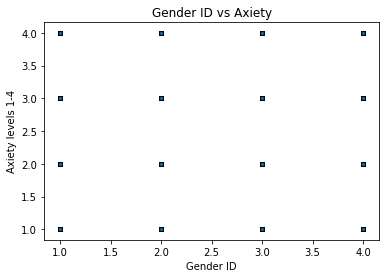

In [41]:
plt.scatter(clean_df['GEN ID DESCRIBE'],clean_df['ANXIOUS'], s=15,alpha=.8, edgecolors='black')
plt.xlabel('Gender ID')
plt.ylabel('Axiety levels 1-4')
plt.title('Gender ID vs Axiety')
#plt.grid()

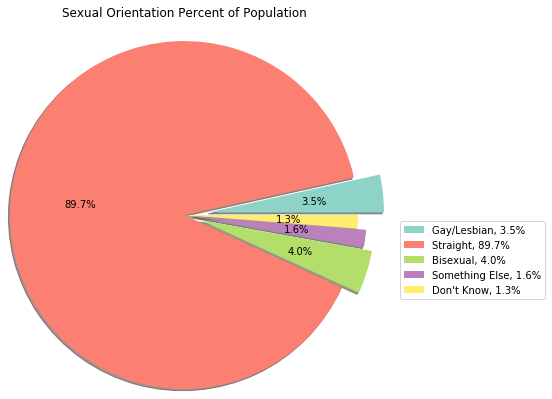

In [188]:
o_counts = clean_df['SCRAM'].groupby(clean_df['SEXUAL ORIENTATION']).count()
labels = ['Gay/Lesbian', 'Straight', 'Bisexual', 'Something Else','Don\'t Know']
pct= [3.5,89.7,4,1.6,1.3]
labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, pct)]
colors = ['fuscia','lightseagreen','aqua','coral', 'slategray']
explode = [0.3, 0, 0.2,  0.1,0]
o_pie = o_counts.plot(kind='pie', labels=labels,explode=explode,colormap='Set3', shadow=True, autopct='%1.1f%%', radius=2, legend=True, labeldistance=None)
plt.title('Sexual Orientation Percent of Population',pad=90)
plt.legend( bbox_to_anchor=(1,0.5), loc="best", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
o_pie.yaxis.set_visible(False)
plt.show()


